In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps

In [50]:
data  = pd.read_excel('Unemployment_Rate_India.xlsx')

In [51]:
data.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [52]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [54]:
#data preprocessing
# 1. Data Cleaning
data.isnull().sum() 

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [55]:
data.isna().sum()  # returns the count of NA values in each column .NA values can include both null values and other types of missing values

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [56]:
data = data.dropna() # Drop rows with missing values

In [57]:
data.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [58]:
data = data.fillna(data.mean()) # Fill missing values with the mean

C:\Users\SRIJAN\AppData\Local\Temp\ipykernel_27612\2522539253.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean()) # Fill missing values with the mean


In [59]:
data = data.drop_duplicates(['Date', 'Region'])  # Remove Duplicate Entries

In [60]:
data.shape

(385, 7)

In [61]:
#Data Reshaping
data.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
668,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban
736,Uttarakhand,31-03-2020,Monthly,8.15,889245.0,33.33,Urban


In [62]:
data.rename(columns={'Region': 'State'}, inplace=True) # Renaming the 'Region' Column to 'State' Column

In [63]:
data.tail(2)

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
668,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban
736,Uttarakhand,31-03-2020,Monthly,8.15,889245.0,33.33,Urban


In [64]:
# Calculate average unemployment rate by state
average_unemployment_rate = data.groupby('State')['Estimated Unemployment Rate (%)'].mean()

In [65]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [66]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Tripura
Highest unemployment rate: 27.166428571428572


In [67]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [68]:
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 2.4750000000000005


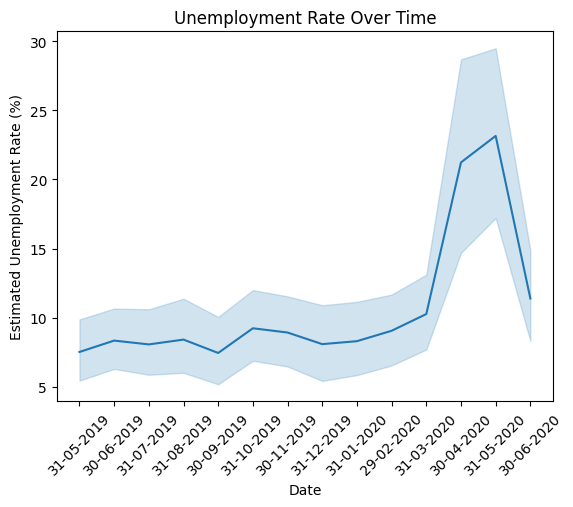

In [69]:
#Line plot displaying the unemployment rate
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

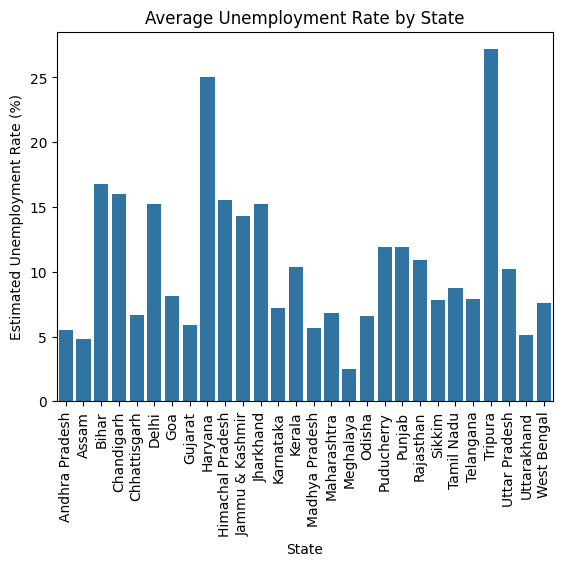

In [70]:
#Bar plot displaying average unemployment rate by state:
state_avg_unemployment = data.groupby('State')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y='Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

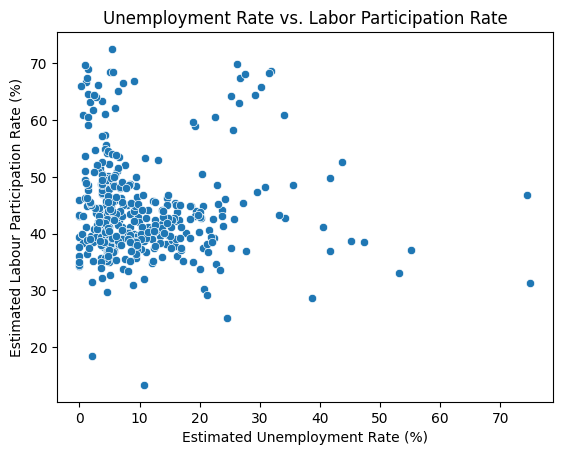

In [71]:
#Scatter plot showing the relationship between unemployment rate and labor participation rate:
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=data)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

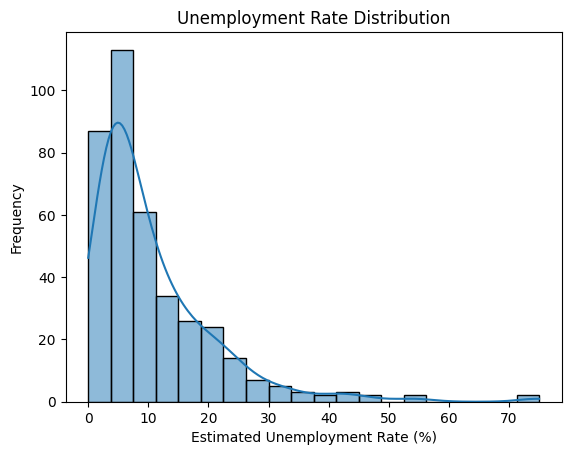

In [72]:
#Histogram of Unemployment Rate Distribution:
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

#### **e. Area Plot of Labor Participation Rate Over Time by State :**

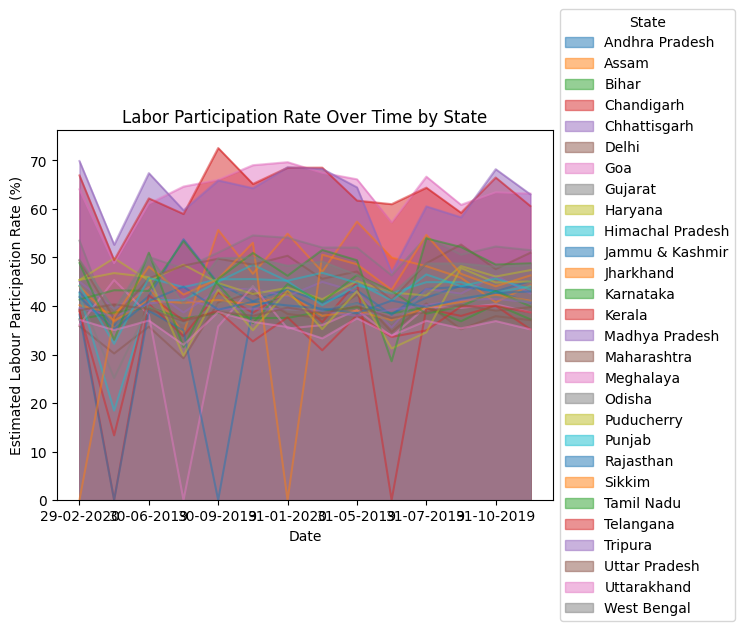

In [73]:
#Area Plot of Labor Participation Rate Over Time by State
state_area_labor_participation = data.pivot(index='Date', columns='State', values='Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### **f. Heatmap of Correlation Matrix:**

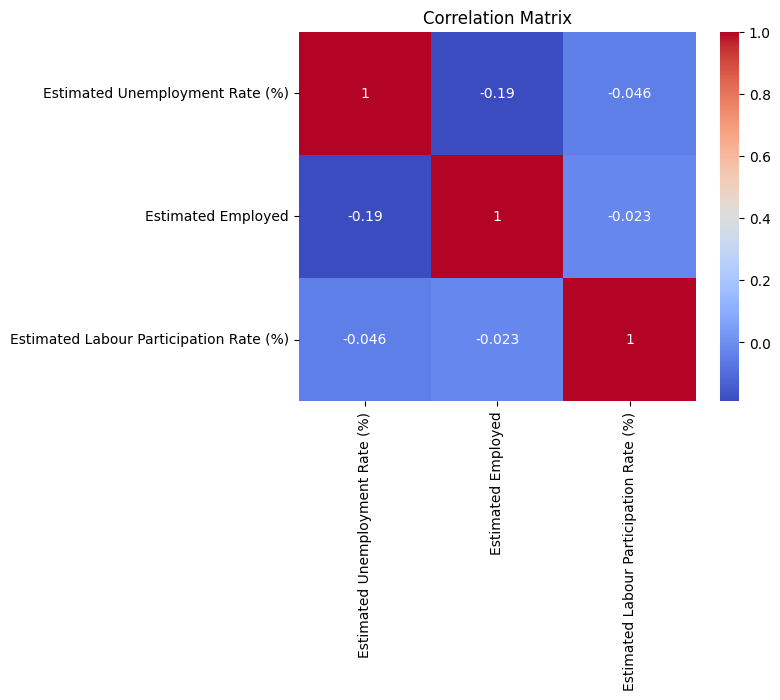

In [74]:
correlation_matrix = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### **g. Stacked Bar Plot of Unemployment Rate by Frequency and State:**

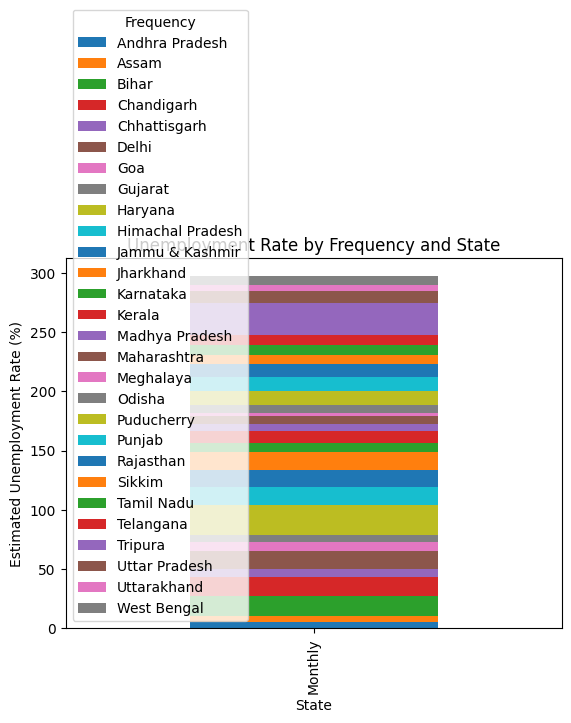

In [75]:
freq_state_unemployment = data.groupby(['Frequency', 'State'])['Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()

#### **h. Boxplot of Unemployment Rate by State:**

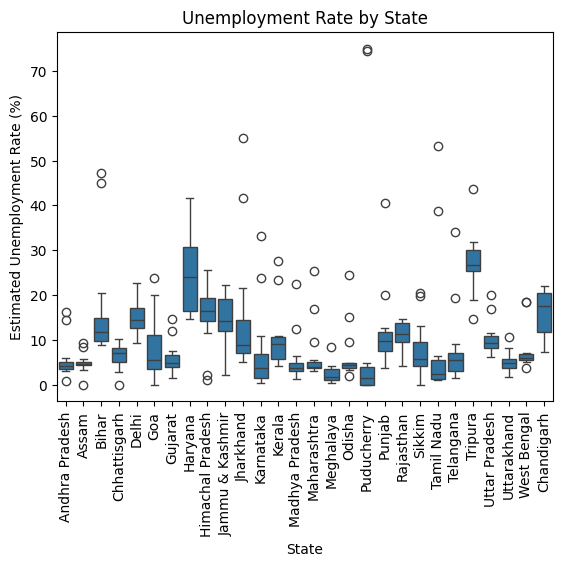

In [76]:
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=data)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()